<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/tweet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,GlobalMaxPooling1D,MaxPooling1D
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation,Dropout


In [57]:
import numpy as np
import pandas as pd
import numpy as array
from sklearn.model_selection import train_test_split

In [58]:
tweet=pd.read_csv('/content/twitter4000.csv')

In [59]:
tweet.head()

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [60]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   twitts     4000 non-null   object
 1   sentiment  4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


In [61]:
tweet.sentiment.value_counts()

1    2000
0    2000
Name: sentiment, dtype: int64

In [62]:
tweet.isnull().sum()

twitts       0
sentiment    0
dtype: int64

In [63]:
tweet.describe()

,sentiment
count,4000.000000
mean,0.500000
std,0.500063
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [64]:
type(tweet.twitts)

pandas.core.series.Series

In [65]:
tlist=tweet.twitts.tolist()

In [66]:
tlist[:5]

['is bored and wants to watch a movie  any suggestions?',
 'back in miami.  waiting to unboard ship ',
 "@misskpey awwww dnt dis brng bak memoriessss,  I thnk I'm sad. LoL",
 'ughhh i am so tired  blahhhhhhhhh',
 "@mandagoforth me bad! It's funny though. Zachary Quinto is only there for a few though.  &amp; to reply just put the @ symbol before the name!"]

In [67]:
token = Tokenizer()
fit_text=token.fit_on_texts(tlist)
token


In [68]:
type(fit_text)

NoneType

In [69]:
y=tweet.sentiment

In [70]:
vocab_size = len(token.word_index) + 1
vocab_size

10135

In [71]:
import itertools 
print(dict(itertools.islice(token.index_word.items(), 100)))


{1: 'i', 2: 'to', 3: 'the', 4: 'a', 5: 'my', 6: 'and', 7: 'you', 8: 'is', 9: 'it', 10: 'in', 11: 'for', 12: 'of', 13: 'me', 14: 'on', 15: 'so', 16: 'that', 17: "i'm", 18: 'have', 19: 'at', 20: 'but', 21: 'just', 22: 'was', 23: 'with', 24: 'not', 25: 'be', 26: 'this', 27: 'day', 28: 'up', 29: 'now', 30: 'good', 31: 'all', 32: 'get', 33: 'out', 34: 'go', 35: 'no', 36: 'http', 37: 'today', 38: 'like', 39: 'are', 40: 'love', 41: 'your', 42: 'quot', 43: 'too', 44: 'lol', 45: 'work', 46: 'got', 47: "it's", 48: 'amp', 49: 'do', 50: 'com', 51: 'u', 52: 'back', 53: 'going', 54: 'what', 55: 'time', 56: 'from', 57: 'had', 58: 'will', 59: 'know', 60: 'about', 61: 'im', 62: 'am', 63: "don't", 64: 'can', 65: 'one', 66: 'really', 67: "can't", 68: 'we', 69: 'oh', 70: 'well', 71: 'still', 72: '2', 73: 'some', 74: 'its', 75: 'miss', 76: 'want', 77: 'see', 78: 'when', 79: 'home', 80: 'think', 81: 'an', 82: 'as', 83: 'if', 84: 'night', 85: 'need', 86: 'again', 87: 'new', 88: 'there', 89: 'morning', 90: 'h

In [72]:
x = ['he go home']
token.texts_to_sequences(x)

[[125, 34, 79]]

In [73]:
encoded=token.texts_to_sequences(tlist)

In [74]:
max_length = 120
X = pad_sequences(encoded, maxlen=max_length, padding='post')
print(X)

[[    8   304     6 ...     0     0     0]
 [   52    10  1019 ...     0     0     0]
 [ 3082  1197   668 ...     0     0     0]
 ...
 [ 1033    21  1021 ...     0     0     0]
 [10134   134     7 ...     0     0     0]
 [   94    11   226 ...     0     0     0]]


In [75]:
encoded[:3]

[[8, 304, 6, 345, 2, 191, 4, 236, 254, 3079],
 [52, 10, 1019, 206, 2, 3080, 3081],
 [3082, 1197, 668, 1955, 3083, 1956, 3084, 1, 3085, 17, 115, 44]]

In [76]:
max_length = 120
x= pad_sequences(encoded, maxlen=max_length, padding='post')
print(x)

[[    8   304     6 ...     0     0     0]
 [   52    10  1019 ...     0     0     0]
 [ 3082  1197   668 ...     0     0     0]
 ...
 [ 1033    21  1021 ...     0     0     0]
 [10134   134     7 ...     0     0     0]
 [   94    11   226 ...     0     0     0]]


In [77]:
x.shape

(4000, 120)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

In [79]:
vec_size=300


In [80]:
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))


In [81]:
model.add(Conv1D(64, 8, activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

In [82]:
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

In [83]:
model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))


In [84]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [85]:
history=model.fit(x_train,y_train,batch_size=100,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
32/32 [==============================] - 11s 339ms/step - loss: 0.6976 - accuracy: 0.4872 - val_loss: 0.6927 - val_accuracy: 0.5088
Epoch 2/10
32/32 [==============================] - 11s 334ms/step - loss: 0.6913 - accuracy: 0.5247 - val_loss: 0.6900 - val_accuracy: 0.5038
Epoch 3/10
32/32 [==============================] - 11s 333ms/step - loss: 0.6640 - accuracy: 0.5922 - val_loss: 0.6517 - val_accuracy: 0.6288
Epoch 4/10
32/32 [==============================] - 11s 334ms/step - loss: 0.5093 - accuracy: 0.7772 - val_loss: 0.5848 - val_accuracy: 0.7000
Epoch 5/10
32/32 [==============================] - 11s 333ms/step - loss: 0.2659 - accuracy: 0.9031 - val_loss: 0.6107 - val_accuracy: 0.7125
Epoch 6/10
32/32 [==============================] - 11s 333ms/step - loss: 0.1101 - accuracy: 0.9644 - val_loss: 0.7167 - val_accuracy: 0.7188
Epoch 7/10
32/32 [==============================] - 11s 335ms/step - loss: 0.0506 - accuracy: 0.9869 - val_loss: 0.8080 - val_accuracy: 0.7100

In [86]:
import matplotlib.pyplot as plt


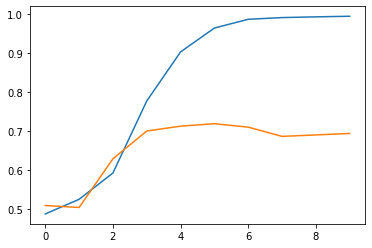

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

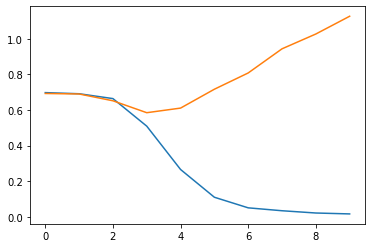

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])